In [118]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ta

In [119]:
nifty50_stocks = ['RELIANCE.NS', 'INFY.NS', 'HDFCBANK.NS']

In [120]:
df = yf.Ticker('RELIANCE.NS').history(interval='1d', period='6mo')

In [121]:
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2025-02-01 00:00:00+05:30,1265.099976,1270.550049,1241.000000,1264.599976,7118453,0.0,0.0
2025-02-03 00:00:00+05:30,1251.000000,1256.000000,1237.550049,1245.900024,9252345,0.0,0.0
2025-02-04 00:00:00+05:30,1248.050049,1288.800049,1246.599976,1285.199951,16691069,0.0,0.0
2025-02-05 00:00:00+05:30,1282.650024,1290.500000,1276.699951,1278.199951,10112028,0.0,0.0
2025-02-06 00:00:00+05:30,1273.699951,1288.000000,1270.349976,1281.550049,9956001,0.0,0.0


In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 124 entries, 2025-02-01 00:00:00+05:30 to 2025-08-01 00:00:00+05:30
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          124 non-null    float64
 1   High          124 non-null    float64
 2   Low           124 non-null    float64
 3   Close         124 non-null    float64
 4   Volume        124 non-null    int64  
 5   Dividends     124 non-null    float64
 6   Stock Splits  124 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 7.8 KB


In [123]:
def apply_indicators(df):
    df['RSI'] = ta.momentum.RSIIndicator(df['Close']).rsi()
    df['MA20'] = df['Close'].rolling(20).mean()
    df['MA50'] = df['Close'].rolling(50).mean()
    df.dropna(inplace=True)
    return df

def generate_signals(df):
    df['Buy'] = (df['RSI'] < 30) & (df['MA20'] > df['MA50'])
    df['Sell'] = (df['RSI'] > 70) & (df['MA20'] < df['MA50'])
    return df

In [124]:
df = apply_indicators(df)
df = generate_signals(df)
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,RSI,MA20,MA50,Buy,Sell
Date,,,,,,,,,,,,
2025-04-17 00:00:00+05:30,1240.199951,1280.199951,1227.599976,1274.500000,15398401,0.0,0.0,58.859541,1245.432483,1236.629995,False,False
2025-04-21 00:00:00+05:30,1270.000000,1300.900024,1267.000000,1295.500000,10429964,0.0,0.0,62.560183,1248.264984,1237.247996,False,False
2025-04-22 00:00:00+05:30,1300.000000,1303.900024,1286.300049,1291.199951,13051707,0.0,0.0,61.343396,1250.467480,1238.153994,False,False
2025-04-23 00:00:00+05:30,1297.000000,1306.000000,1285.400024,1300.000000,10480888,0.0,0.0,62.932338,1252.009979,1238.449995,False,False
2025-04-24 00:00:00+05:30,1292.400024,1304.500000,1290.300049,1301.599976,10468940,0.0,0.0,63.228283,1253.272479,1238.917996,False,False


In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 75 entries, 2025-04-17 00:00:00+05:30 to 2025-08-01 00:00:00+05:30
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          75 non-null     float64
 1   High          75 non-null     float64
 2   Low           75 non-null     float64
 3   Close         75 non-null     float64
 4   Volume        75 non-null     int64  
 5   Dividends     75 non-null     float64
 6   Stock Splits  75 non-null     float64
 7   RSI           75 non-null     float64
 8   MA20          75 non-null     float64
 9   MA50          75 non-null     float64
 10  Buy           75 non-null     bool   
 11  Sell          75 non-null     bool   
dtypes: bool(2), float64(9), int64(1)
memory usage: 6.6 KB


In [126]:
def prepare_features(df):
    df['Target'] = (df['Close'].shift(-1) > df['Close']).astype(int)
    df.dropna(inplace=True)
    return df

In [127]:
df = prepare_features(df)
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,RSI,MA20,MA50,Buy,Sell,Target
Date,,,,,,,,,,,,,
2025-04-17 00:00:00+05:30,1240.199951,1280.199951,1227.599976,1274.500000,15398401,0.0,0.0,58.859541,1245.432483,1236.629995,False,False,1
2025-04-21 00:00:00+05:30,1270.000000,1300.900024,1267.000000,1295.500000,10429964,0.0,0.0,62.560183,1248.264984,1237.247996,False,False,0
2025-04-22 00:00:00+05:30,1300.000000,1303.900024,1286.300049,1291.199951,13051707,0.0,0.0,61.343396,1250.467480,1238.153994,False,False,1
2025-04-23 00:00:00+05:30,1297.000000,1306.000000,1285.400024,1300.000000,10480888,0.0,0.0,62.932338,1252.009979,1238.449995,False,False,1
2025-04-24 00:00:00+05:30,1292.400024,1304.500000,1290.300049,1301.599976,10468940,0.0,0.0,63.228283,1253.272479,1238.917996,False,False,0


In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 75 entries, 2025-04-17 00:00:00+05:30 to 2025-08-01 00:00:00+05:30
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          75 non-null     float64
 1   High          75 non-null     float64
 2   Low           75 non-null     float64
 3   Close         75 non-null     float64
 4   Volume        75 non-null     int64  
 5   Dividends     75 non-null     float64
 6   Stock Splits  75 non-null     float64
 7   RSI           75 non-null     float64
 8   MA20          75 non-null     float64
 9   MA50          75 non-null     float64
 10  Buy           75 non-null     bool   
 11  Sell          75 non-null     bool   
 12  Target        75 non-null     int64  
dtypes: bool(2), float64(9), int64(2)
memory usage: 7.2 KB


In [129]:
bool_cols = df.select_dtypes(include='bool').columns

In [130]:
df[bool_cols] = df[bool_cols].astype(int)

<Axes: >

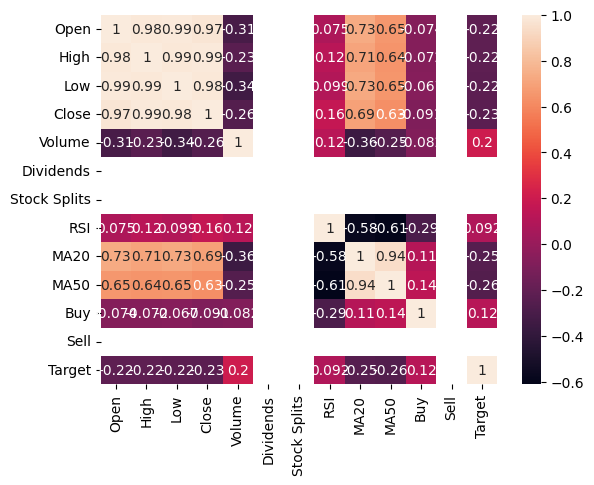

In [131]:
sns.heatmap(df.corr(), annot=True)

In [132]:
df.drop(columns=['Dividends', 'Stock Splits','Sell','Buy'], inplace=True)

In [133]:
def time_series_split(df, train_size=0.8):
    split_index = int(len(df) * train_size)
    train_df = df.iloc[:split_index]
    test_df = df.iloc[split_index:]
    return train_df, test_df

In [134]:
train_df, test_df = time_series_split(df)
X_train = train_df.drop(columns=['Target'])
y_train = train_df['Target']
X_test = test_df.drop(columns=['Target'])
y_test = test_df['Target']

In [135]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [136]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    
    print(f"Accuracy: {accuracy:.2f}")
    print("Classification Report:\n", report)
    print("Confusion Matrix:\n", cm)

In [137]:
evaluate_model(model, X_test, y_test)

Accuracy: 0.33
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.40      0.44        10
           1       0.14      0.20      0.17         5

    accuracy                           0.33        15
   macro avg       0.32      0.30      0.31        15
weighted avg       0.38      0.33      0.35        15

Confusion Matrix:
 [[4 6]
 [4 1]]


In [138]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=800)
rf.fit(X_train, y_train)

,n_estimators,800
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [139]:
evaluate_model(rf, X_test, y_test)

Accuracy: 0.40
Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.30      0.40        10
           1       0.30      0.60      0.40         5

    accuracy                           0.40        15
   macro avg       0.45      0.45      0.40        15
weighted avg       0.50      0.40      0.40        15

Confusion Matrix:
 [[3 7]
 [2 3]]


In [140]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

,priors,None
,var_smoothing,1e-09


In [141]:
evaluate_model(model, X_test, y_test)

Accuracy: 0.33
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.40      0.44        10
           1       0.14      0.20      0.17         5

    accuracy                           0.33        15
   macro avg       0.32      0.30      0.31        15
weighted avg       0.38      0.33      0.35        15

Confusion Matrix:
 [[4 6]
 [4 1]]


In [142]:
mnb = MultinomialNB()
mnb.fit(X_train, y_train)


,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None


In [143]:
evaluate_model(mnb, X_test, y_test)

Accuracy: 0.60
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.70      0.70        10
           1       0.40      0.40      0.40         5

    accuracy                           0.60        15
   macro avg       0.55      0.55      0.55        15
weighted avg       0.60      0.60      0.60        15

Confusion Matrix:
 [[7 3]
 [3 2]]
